# EDSA Apple Prices Challenge

## Introduction
Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?

## Content
With this context, EDSA is challenging you to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.

## Problem Statement
Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.

## Data Overview

This dataset consists of over 60 000 sales made by Durban Fresh Produce Market.
For this Predict, we will use this data to predict the average price per kilogram of Golden Delicious Apples.

## Data Source
The data for this dataset was obtained from Durban Fresh Produce Market and adjusted to suit this challenge's needs, provided by Kaggle(https://www.kaggle.com/c/edsa-apple-prices-challenge/data).

## Data Set Supplied Files
- df-test_set.csv - The test split of the dataset
- df-train_set.csv - The training split of the dataset
- sample_submission.csv - Sample of the submission format for the hackathon

## Data Set Supplied Files
- df-test_set.csv - The test split of the dataset
- df-train_set.csv - The training split of the dataset
- sample_submission.csv - Sample of the submission format for the hackathon

## Importing Libraries

In [1]:
# Importing Numpy, Pandas
import numpy as np
import pandas as pd

# Visuals
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
import matplotlib.style as style
from plotly.subplots import make_subplots
from scipy import stats
import pickle
%matplotlib inline


# Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.simplefilter(action='ignore')

## Importing Data

In [2]:
df_train = pd.read_csv('df - train_set.csv')

In [3]:
df_test = pd.read_csv('df - test_set.csv')

## Check Data

Take a quick look at our training data from df - train_set.

In [4]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [5]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [6]:
df_train.shape

(64376, 13)

In [7]:
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


##### df_train has **6437 rows and 14 columns.** df_train.shape will only show us what data type each column has, below we will use the .info method to confirm the data type.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


**None on the columns contain any null or missing values.** Currently the categorical features are Province, Container, Size_Grade, Date and Commodities. Weight_Kg, Low_Price, High_Price, Sales_Total, Total_Qty_Sold, Total_Kg_Sold, Stock_On_Hand and avg_price_per_kg are numerical.

Text(0.5, 1.0, 'Percent missing data by feature')

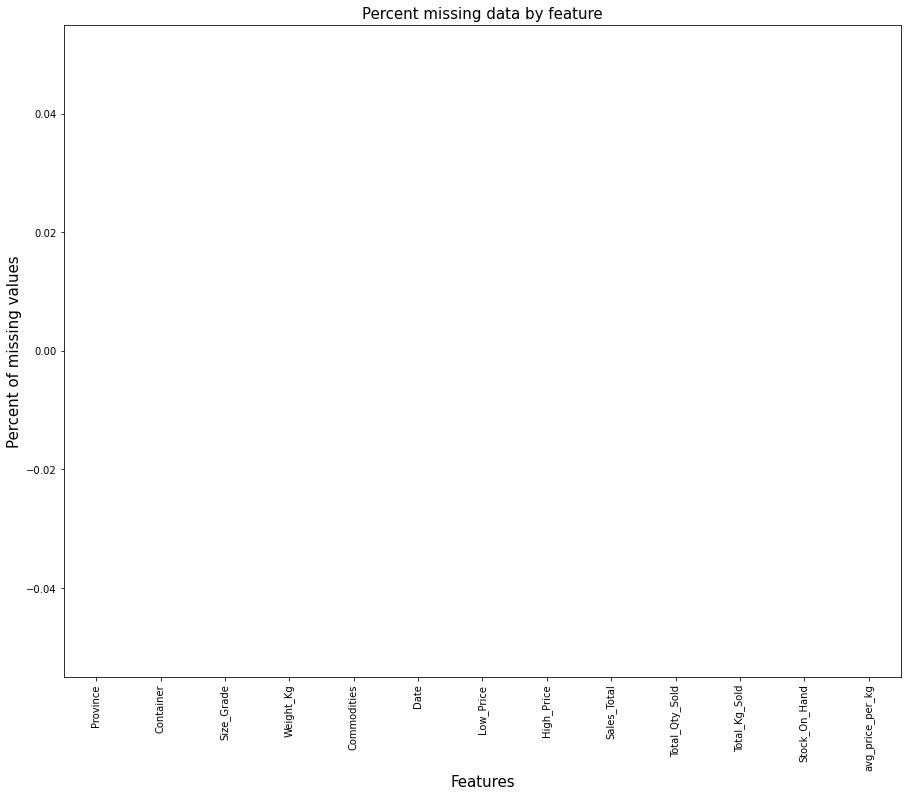

In [9]:
all_data = (df_train.isnull().sum() / len(df_train)) * 100


f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data.index, y=all_data)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [10]:
#Check for null values
df_train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

##### This confirms that **there are no null values** in the data.

In [11]:
#Now we check for any duplicates in our train data 
duplicateRowsDF = df_train[df_train.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Province, Container, Size_Grade, Weight_Kg, Commodities, Date, Low_Price, High_Price, Sales_Total, Total_Qty_Sold, Total_Kg_Sold, Stock_On_Hand, avg_price_per_kg]
Index: []


##### As we can see from our results, **there are no repeating rows.**

## Preliminary Data Pre-processing.

##### Our main focus is on **"Golden Delicous Apples"** under the commodities column. Our next step is to filter out all other commodities that are not required.

In [12]:
#Filtering all other commodities as we focus only on APPLE GOLDEN DELICIOUS
df_train = df_train[df_train.Commodities == 'APPLE GOLDEN DELICIOUS']

#Then we drop our 
df_train.drop(["Commodities"], inplace=True, axis=1 )

##### We realised that the datatype of our Date column is an object. **So we need to convert Date column to datetime** so that we can be able to use it and create other useful columns  

In [13]:
#Weconverted Date column from object to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

#We created new columns Year, Month, Day from the Date column
df_train['Day'] = df_train['Date'].dt.day
df_train['Month'] = df_train['Date'].dt.month
df_train['Year'] = df_train['Date'].dt.year

#We then created the Seasons column as it might be useful and relevant in affecting our  price of apple sales
date = df_train.Date.dt.month*100 + df_train.Date.dt.day
df_train['Seasons'] = (pd.cut(date,[0,321,620,922,1220,1300],
                       labels=['Summer','Autumn','Winter','Spring','Summer'],ordered =False)
                  .str.strip()
               )

#Then we drop the Date column since we already broke it down to three columns(Year,Month and Day)
df_train.drop(['Date'], inplace=True, axis=1)


df_train["Total_Quantity_Stock"] = df_train["Total_Qty_Sold"] + df_train["Stock_On_Hand"]
df_train

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month,Year,Seasons,Total_Quantity_Stock
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9,2020,Winter,1154
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,2020,Autumn,320
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,16,4,2020,Autumn,1524
40,CAPE,M4183,1S,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,2020,Autumn,831
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9,2020,Spring,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,96.0,96.0,1920.0,20,240.0,53,8.00,4,3,2020,Summer,73
64291,ORANGE FREE STATE,M4183,1X,18.3,130.0,130.0,7280.0,56,1024.8,74,7.10,22,2,2020,Summer,130
64297,CAPE,JE090,2M,9.0,50.0,60.0,4540.0,89,801.0,793,5.67,22,4,2020,Autumn,882
64304,CAPE,JG110,2M,11.0,30.0,40.0,2140.0,70,770.0,0,2.78,4,3,2020,Summer,70


In [14]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month,Year,Seasons,Total_Quantity_Stock
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9,2020,Winter,1154
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,2020,Autumn,320
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,16,4,2020,Autumn,1524
40,CAPE,M4183,1S,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,2020,Autumn,831
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9,2020,Spring,3


## Exploratory Data Analysis (EDA)

### Summary Statistics

In [15]:
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month,Year,Total_Quantity_Stock
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893,15.866291,5.609119,2019.968238,582.904713
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744,8.705740,2.687248,0.175412,891.497780
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000,1.000000,1.000000,2019.000000,1.000000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000,9.000000,3.000000,2020.000000,76.000000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000,16.000000,6.000000,2020.000000,270.000000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000,23.000000,7.000000,2020.000000,712.500000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000,31.000000,12.000000,2020.000000,7599.000000


#### To measure if any outliers are present in our df_train dataframe we conduct our test by **calculating the Kurtosis and Skew.**

In [16]:
df_train.kurtosis()

Weight_Kg                9.109698
Low_Price               17.073369
High_Price              13.630768
Sales_Total             24.200524
Total_Qty_Sold          32.338123
Total_Kg_Sold           45.153801
Stock_On_Hand           14.671224
avg_price_per_kg         1.042921
Day                     -1.122178
Month                   -0.620111
Year                    26.587803
Total_Quantity_Stock    14.174078
dtype: float64

* **Weight_Kg**          - Fairly high measure of outliers (X > 3) 
* **Low_Price**          - Fairly high measure of outliers (X > 3)
* **High_Price**         - Fairly high measure of outliers (X > 3)
* **Sales_Total**        - Fairly high measure of outliers (X > 3)
* **Total_Qty_Sold**     - Fairly high measure of outliers (X > 3)
* **Total_Kg_Sold**      - Fairly high measure of outliers (X > 3)
* **Stock_On_Hand**      - Fairly high measure of outliers (X > 3)
* **Total_Quantity_Stock**-Fairly high measure of outliers (X > 3)
* **avg_price_per_kg**   - Lack of outlires (X < 3)
* **Day**                - Lack of outlires (X < 3)
* **Month**              - Lack of outlires (X < 3)
* **Year**               - Fairly high measure of outliers (X > 3)

In [17]:
df_train.skew()

Weight_Kg               3.328254
Low_Price               4.222672
High_Price              3.828819
Sales_Total             4.250317
Total_Qty_Sold          4.445169
Total_Kg_Sold           5.529586
Stock_On_Hand           3.391815
avg_price_per_kg        0.082452
Day                    -0.021883
Month                   0.078651
Year                   -5.344208
Total_Quantity_Stock    3.298506
dtype: float64

* **Weight_Kg**          - Positively skewed, highly 
* **Low_Price**          - Positively skewed, highly 
* **High_Price**         - Positively skewed, highly 
* **Sales_Total**        - Positively skewed, highly
* **Total_Qty_Sold**     - Positively skewed, highly
* **Total_Kg_Sold**      - Positively skewed, highly
* **Stock_On_Hand**      - Positively skewed, highly 
* **Total_Quantity_Stock**-Positively skewed, highly
* **avg_price_per_kg**   - Fairly Symmetrical
* **Day**                - Fairly symmetrical
* **Month**              - Fairly symmetrical
* **Year**               - High Negative Skew

## **Univariate Analysis: Graphical**

### Dependent variable: Average Price Per Kg

### Distribution

#### We take a first look at the Average Price Per Kg.

In [18]:
df_train['avg_price_per_kg'].describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

#### Mean sale price of 6.78, minimum 0.25 and maximum 21.24. There is a high concentration in the interquartile range which spans only from 5.46 to 8.28.

###### Moving on, we look at the distribution of the Average Price per Kg in more detail.

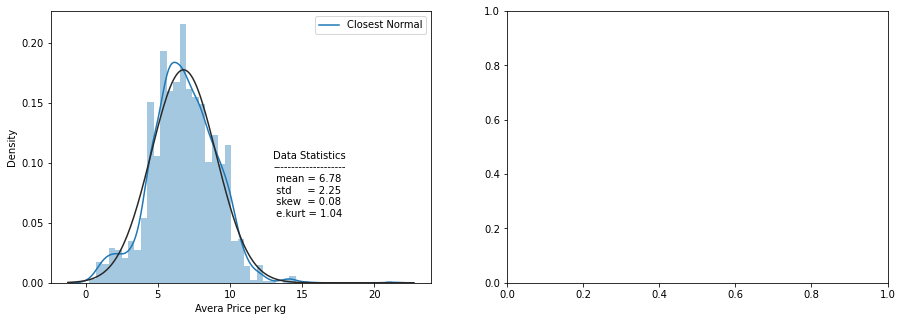

In [19]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
sns.distplot(df_train['avg_price_per_kg'], fit=stats.norm, ax=ax[0])
ax[0].legend(['Closest Normal'])
ax[0].text(x=2^15, y=0.055, 
           s='Data Statistics\n--------------------\n' + 
           ' mean = {:.2f} \n std     = {:.2f}'.format(
               df_train['avg_price_per_kg'].mean(), df_train['avg_price_per_kg'].std()) + 
           '\n skew  = {:.2f} \n e.kurt = {:.2f}'.format(
               df_train['avg_price_per_kg'].skew(), df_train['avg_price_per_kg'].kurt())
          )
ax[0].set_xlabel('Avera Price per kg')
plt.show()

##### The distribution of the Average Price Per Kg looks much symmetric and normal. This in itself makes modeling appealing.

**Now We want to analyse the Numerical feautures first.**

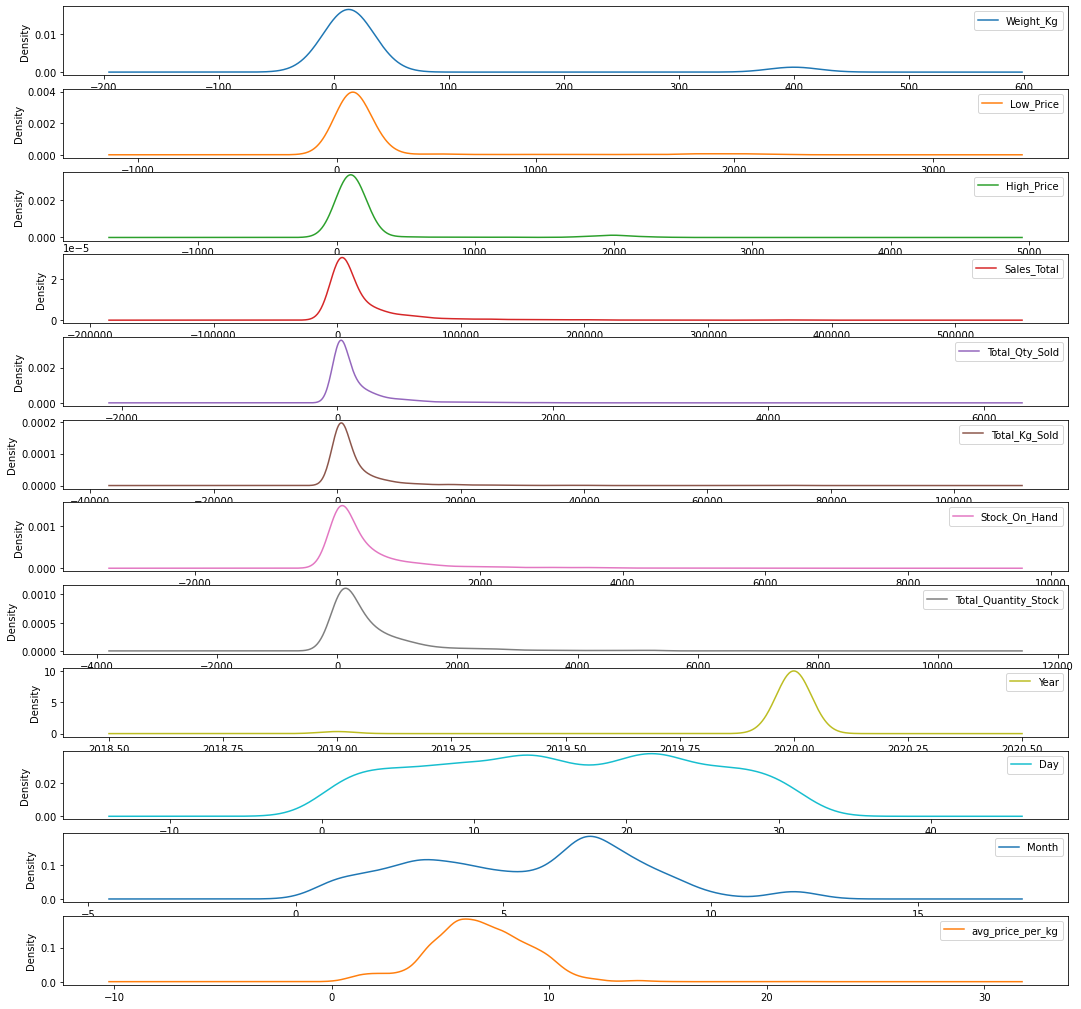

In [21]:
#Create a density plot for all our numerical features

features = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 
            'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand','Total_Quantity_Stock','Year',
            'Day','Month','avg_price_per_kg'] # create a list of all numerical features
df_train[features].plot(kind='density', subplots=True, layout=(12, 1), sharex=False, figsize=(18, 18));

#### **As we can see from the above plots. We see how skew(Positive) our feautures('Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total','Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand','Total_Quantity_Stock') and 'Year' is highly negative skew  and how the outliers are really having an impact on our data.** **But From Day, Month and Average Price Per Kg they are fairly symmentrical.**

**Now We analyse our categorial features using bar and line plots**

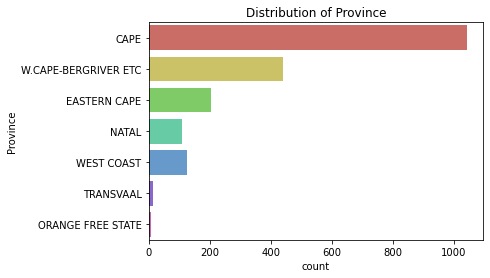

In [22]:
#Bar plot for Province
sns.countplot(y = 'Province', data = df_train, palette="hls")
plt.title("Distribution of Province");

#### We see The amount of apples that each Province produces. As we can see, Cape produces the most apples and Orange produces the least.

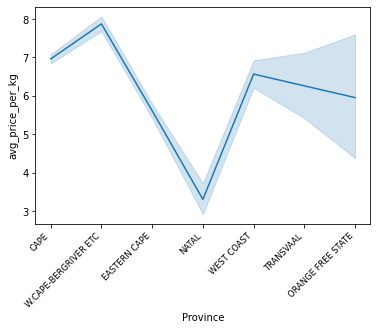

In [23]:
sns.lineplot("Province", "avg_price_per_kg", data=df_train)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.show()

#### From the line graph we see the apples produced in Orange Free State cost a little bit more even though they produce less amount of apples and W.Cape-Bergriver ETC has the most average price per kg.

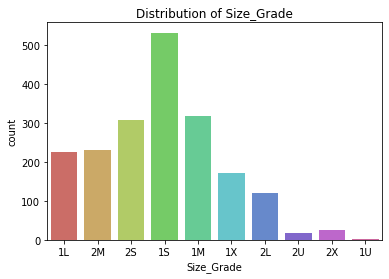

In [24]:
#Bar plot for Size_Grade
sns.countplot(x = 'Size_Grade', data = df_train, palette="hls")
plt.title("Distribution of Size_Grade");

<AxesSubplot:xlabel='Size_Grade', ylabel='avg_price_per_kg'>

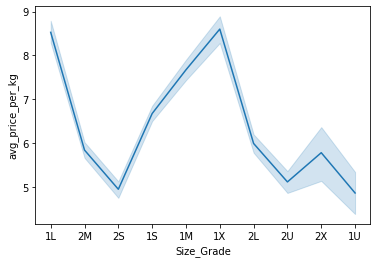

In [25]:
sns.lineplot("Size_Grade", "avg_price_per_kg", data=df_train)

##### We can see the most produced apples are 1S size grade and the least is 1U. So looking at the line graph the most expensive apples is 1X and the least expensive are 1S and 1U.

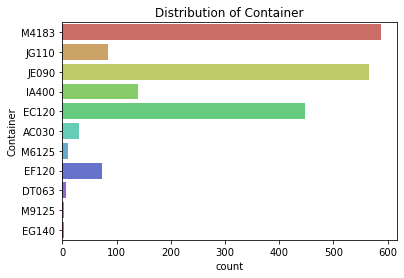

In [26]:
#Bar plot for Containers
sns.countplot(y = 'Container', data = df_train, palette="hls")
plt.title("Distribution of Container");

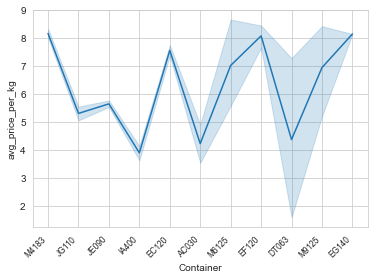

In [85]:
sns.lineplot("Container", "avg_price_per_kg", data=df_train)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.show()

**From the above Bar Plots, we are able to the frequency distribution of our features.**

## Apples according to Seasons. 
#### Are Apples seasonal? NO 

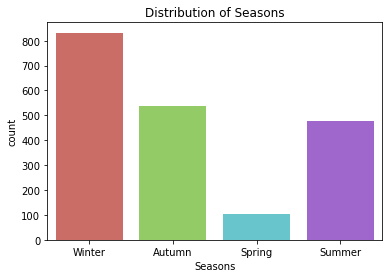

In [27]:
#Bar plot for Seasons
sns.countplot(x = 'Seasons', data = df_train, palette="hls")
plt.title("Distribution of Seasons");

<AxesSubplot:xlabel='Seasons', ylabel='avg_price_per_kg'>

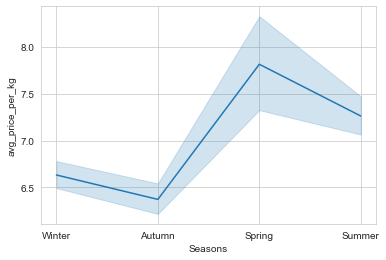

In [51]:
sns.lineplot("Seasons", "avg_price_per_kg", data=df_train)

#### We can see a lot people that they buy more apples during the winter season. Why? Maybe the apples are very cheap and A lot of people tend to snack a lot when they are indoors or they want more vitamins to be healthy and not catch flue, there's a saying that an apple a day keeps the doctor away or the produce/supply of apples is more during winter......The other thing is how people do not buy a lot of apples during spring. Why? Maybe they travel/go out a lot since it is a nice season to be outdoors or people are no longer caring about their health since they swim a lot and it is a hot or the apples are just expensive..............#### We can now see that apples are more expensive during the spring season which answers our previous question why people do not buy a lot of apples during the spring season. Also during winter the apples are fairly affordable 

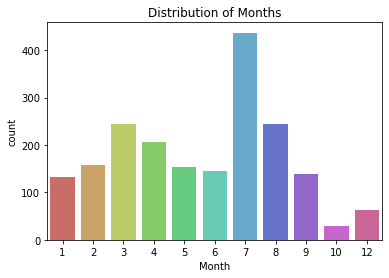

In [30]:
#Bar plot for Months
sns.countplot(x = 'Month', data = df_train, palette="hls")
plt.title("Distribution of Months");

<AxesSubplot:xlabel='Month', ylabel='avg_price_per_kg'>

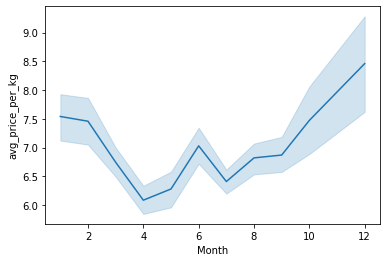

In [31]:
sns.lineplot("Month", "avg_price_per_kg", data=df_train)

#### As we see, most apples were bought during the month of July and from the lineplot we see that the apples on the month of July were not expensive like the month of December(where few apples were bought)..........We can see a lot people that they buy more apples during the 7th month(July/Winter). It makes sense since we saw from the previous bar graph that most apples are bought in winter

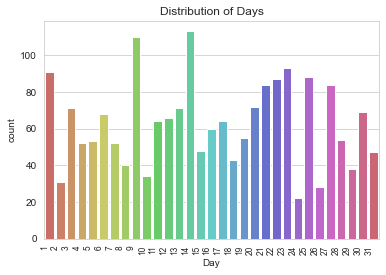

In [54]:
#Bar plot for Days
sns.countplot(x= 'Day', data = df_train, palette="hls")
plt.title("Distribution of Days")
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.show()

<AxesSubplot:xlabel='Day', ylabel='avg_price_per_kg'>

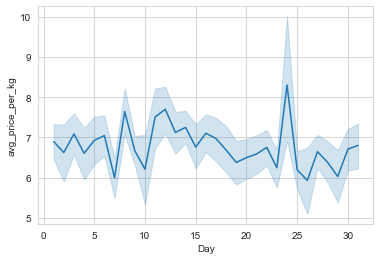

In [52]:
sns.lineplot("Day", "avg_price_per_kg", data=df_train)

#### We see there are few days where people buy a lot of apples. Maybe a day like the 1st of the month is after payday, and also 14th of the month is just before payday. So maybe people buy a lot of apples during those days when they go buy groceries after they got paid.....But as we see from the line graph, 24th day has the few apples bought be cause of the expensiveness. 

## Multivariate Analysis: Graphical

Text(0.5, 1.0, 'Correlation Heatmap')

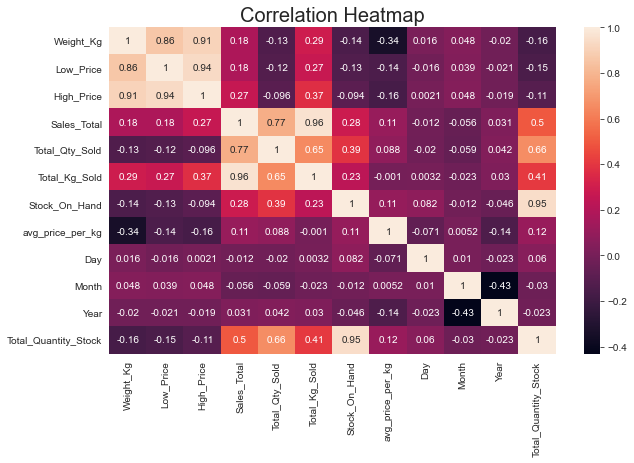

In [90]:
#Now we want to create a heatmap to see how correlated our features are. 
#The visuals easily show the relationships between this features

plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),annot=True) 
plt.title('Correlation Heatmap', fontsize=20)

#### We see that **Weight_Kg, Low_Price and High_Price are highly positively correlated to each other**. Which makes because our prices are really affected by the weight of our Apples. But what we do not understand is how does the Low Price or High Price affect each other, how are they so highly correlated. It is something worth looking at. **Average Price Per Kg is fairly correlated to weight_kg and it makes sense too.**

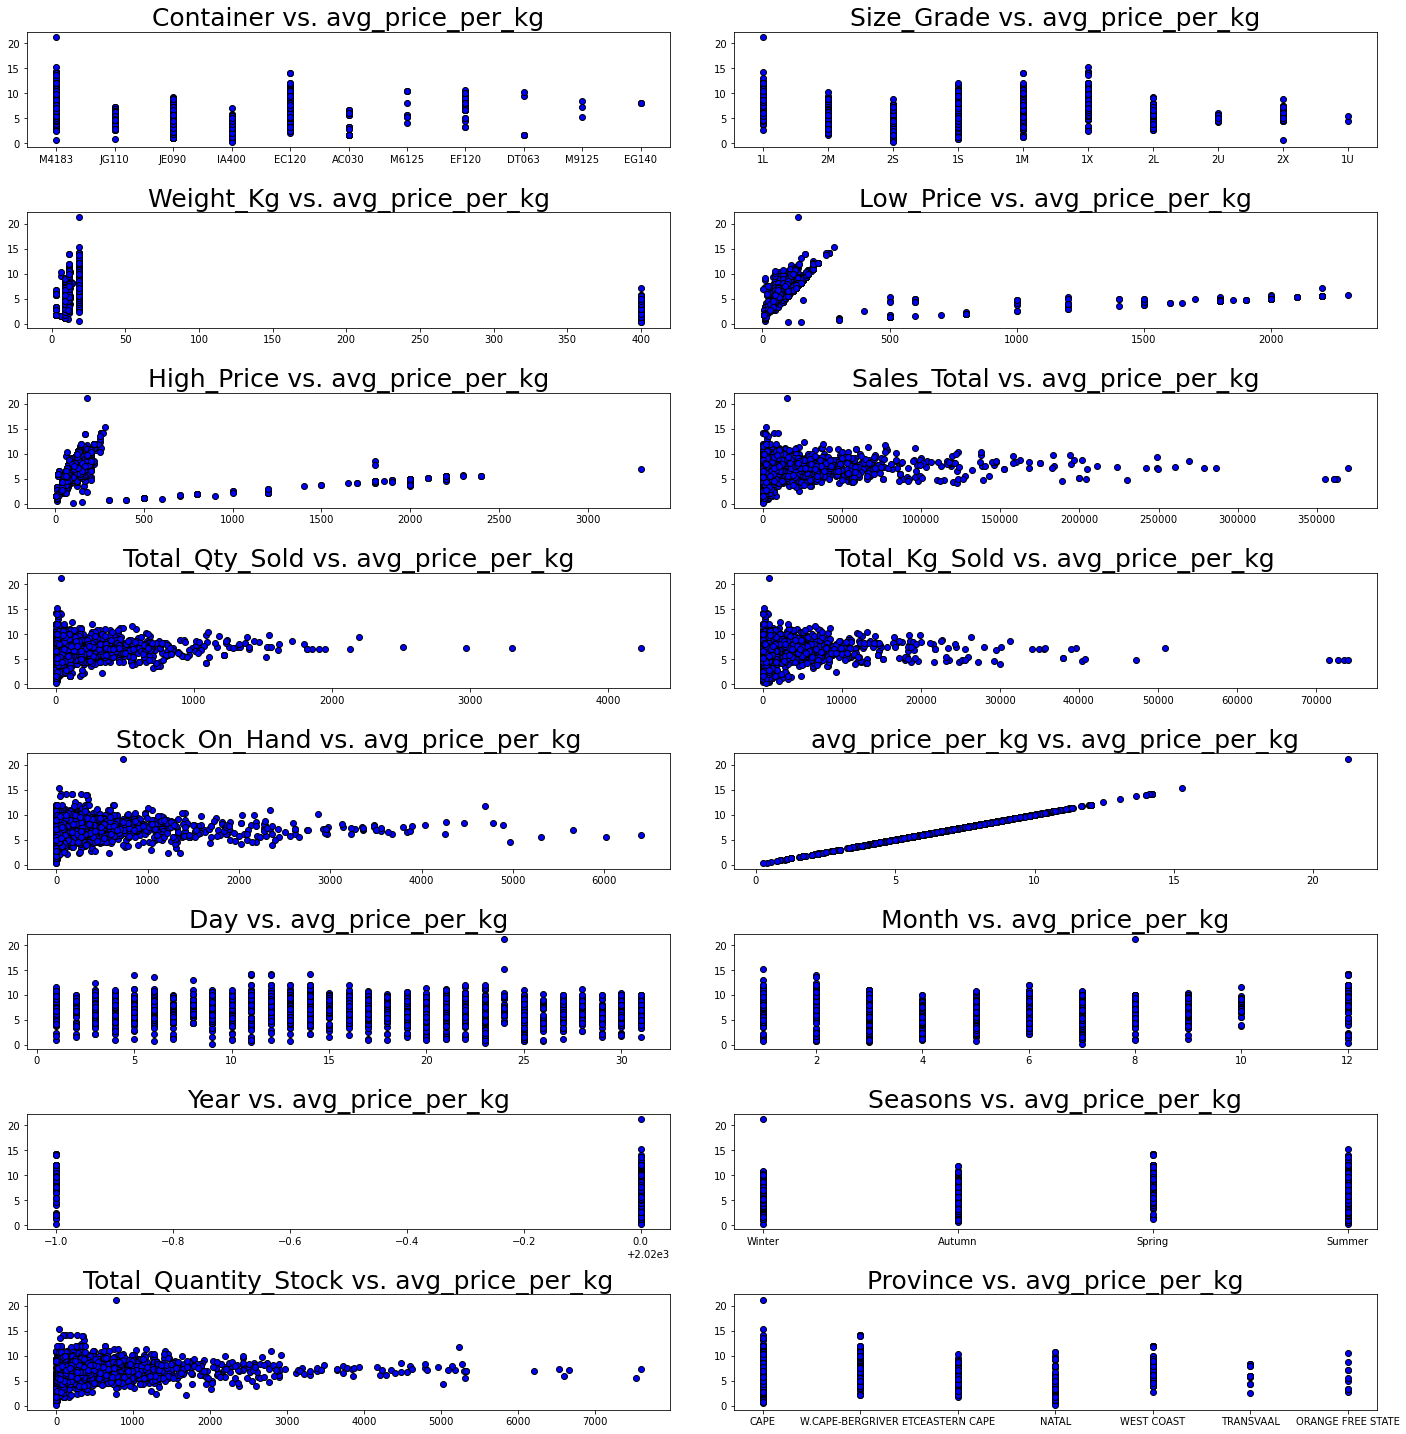

In [34]:
#Check the relationship of all features with the average price per kg. Checking for some linearity

fig, axs = plt.subplots(8,2, figsize=(20,20),)
fig.subplots_adjust(hspace = 30, wspace=30)
axs = axs.ravel()

for index, column in enumerate(df_train.columns):
    axs[index-1].set_title("{} vs. avg_price_per_kg".format(column),fontsize=25)
    axs[index-1].scatter(x=df_train[column],y=df_train['avg_price_per_kg'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

**As we can see, Low Price and High Price have nearly linear relationship**

#### Now we want to see the relationship between Average Price per kg and Weight_Kg according to the Size_Grade(The class of the produce according to their quality)

Number of training observations with more than 30 kg: 139


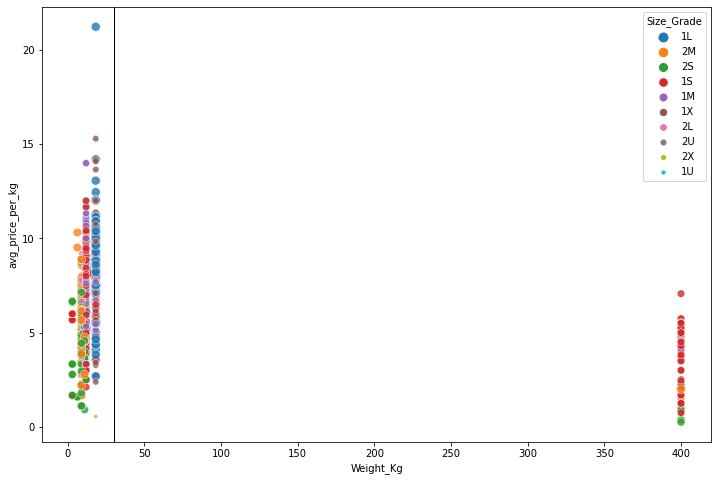

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Weight_Kg",
                y="avg_price_per_kg",
                size="Size_Grade",
                sizes=(10,80),
                alpha=0.8,
                hue="Size_Grade",
                data=df_train)
plt.axvline(30, color='black', linewidth=1)
print('Number of training observations with more than 30 kg: {}'.format(
    (df_train['Weight_Kg'] > 30).sum()))

#### Now we can see that **the higher the quality the higher the average price per kg**. We have 139 Apples that are ourliers that weigh 400kg. Looking at their weight and relevant average prices they do not really make sense unless they cost less because of their size grade(quality)

## Data Pre-processing/Variable Selection

### Checking for Multicollinearity

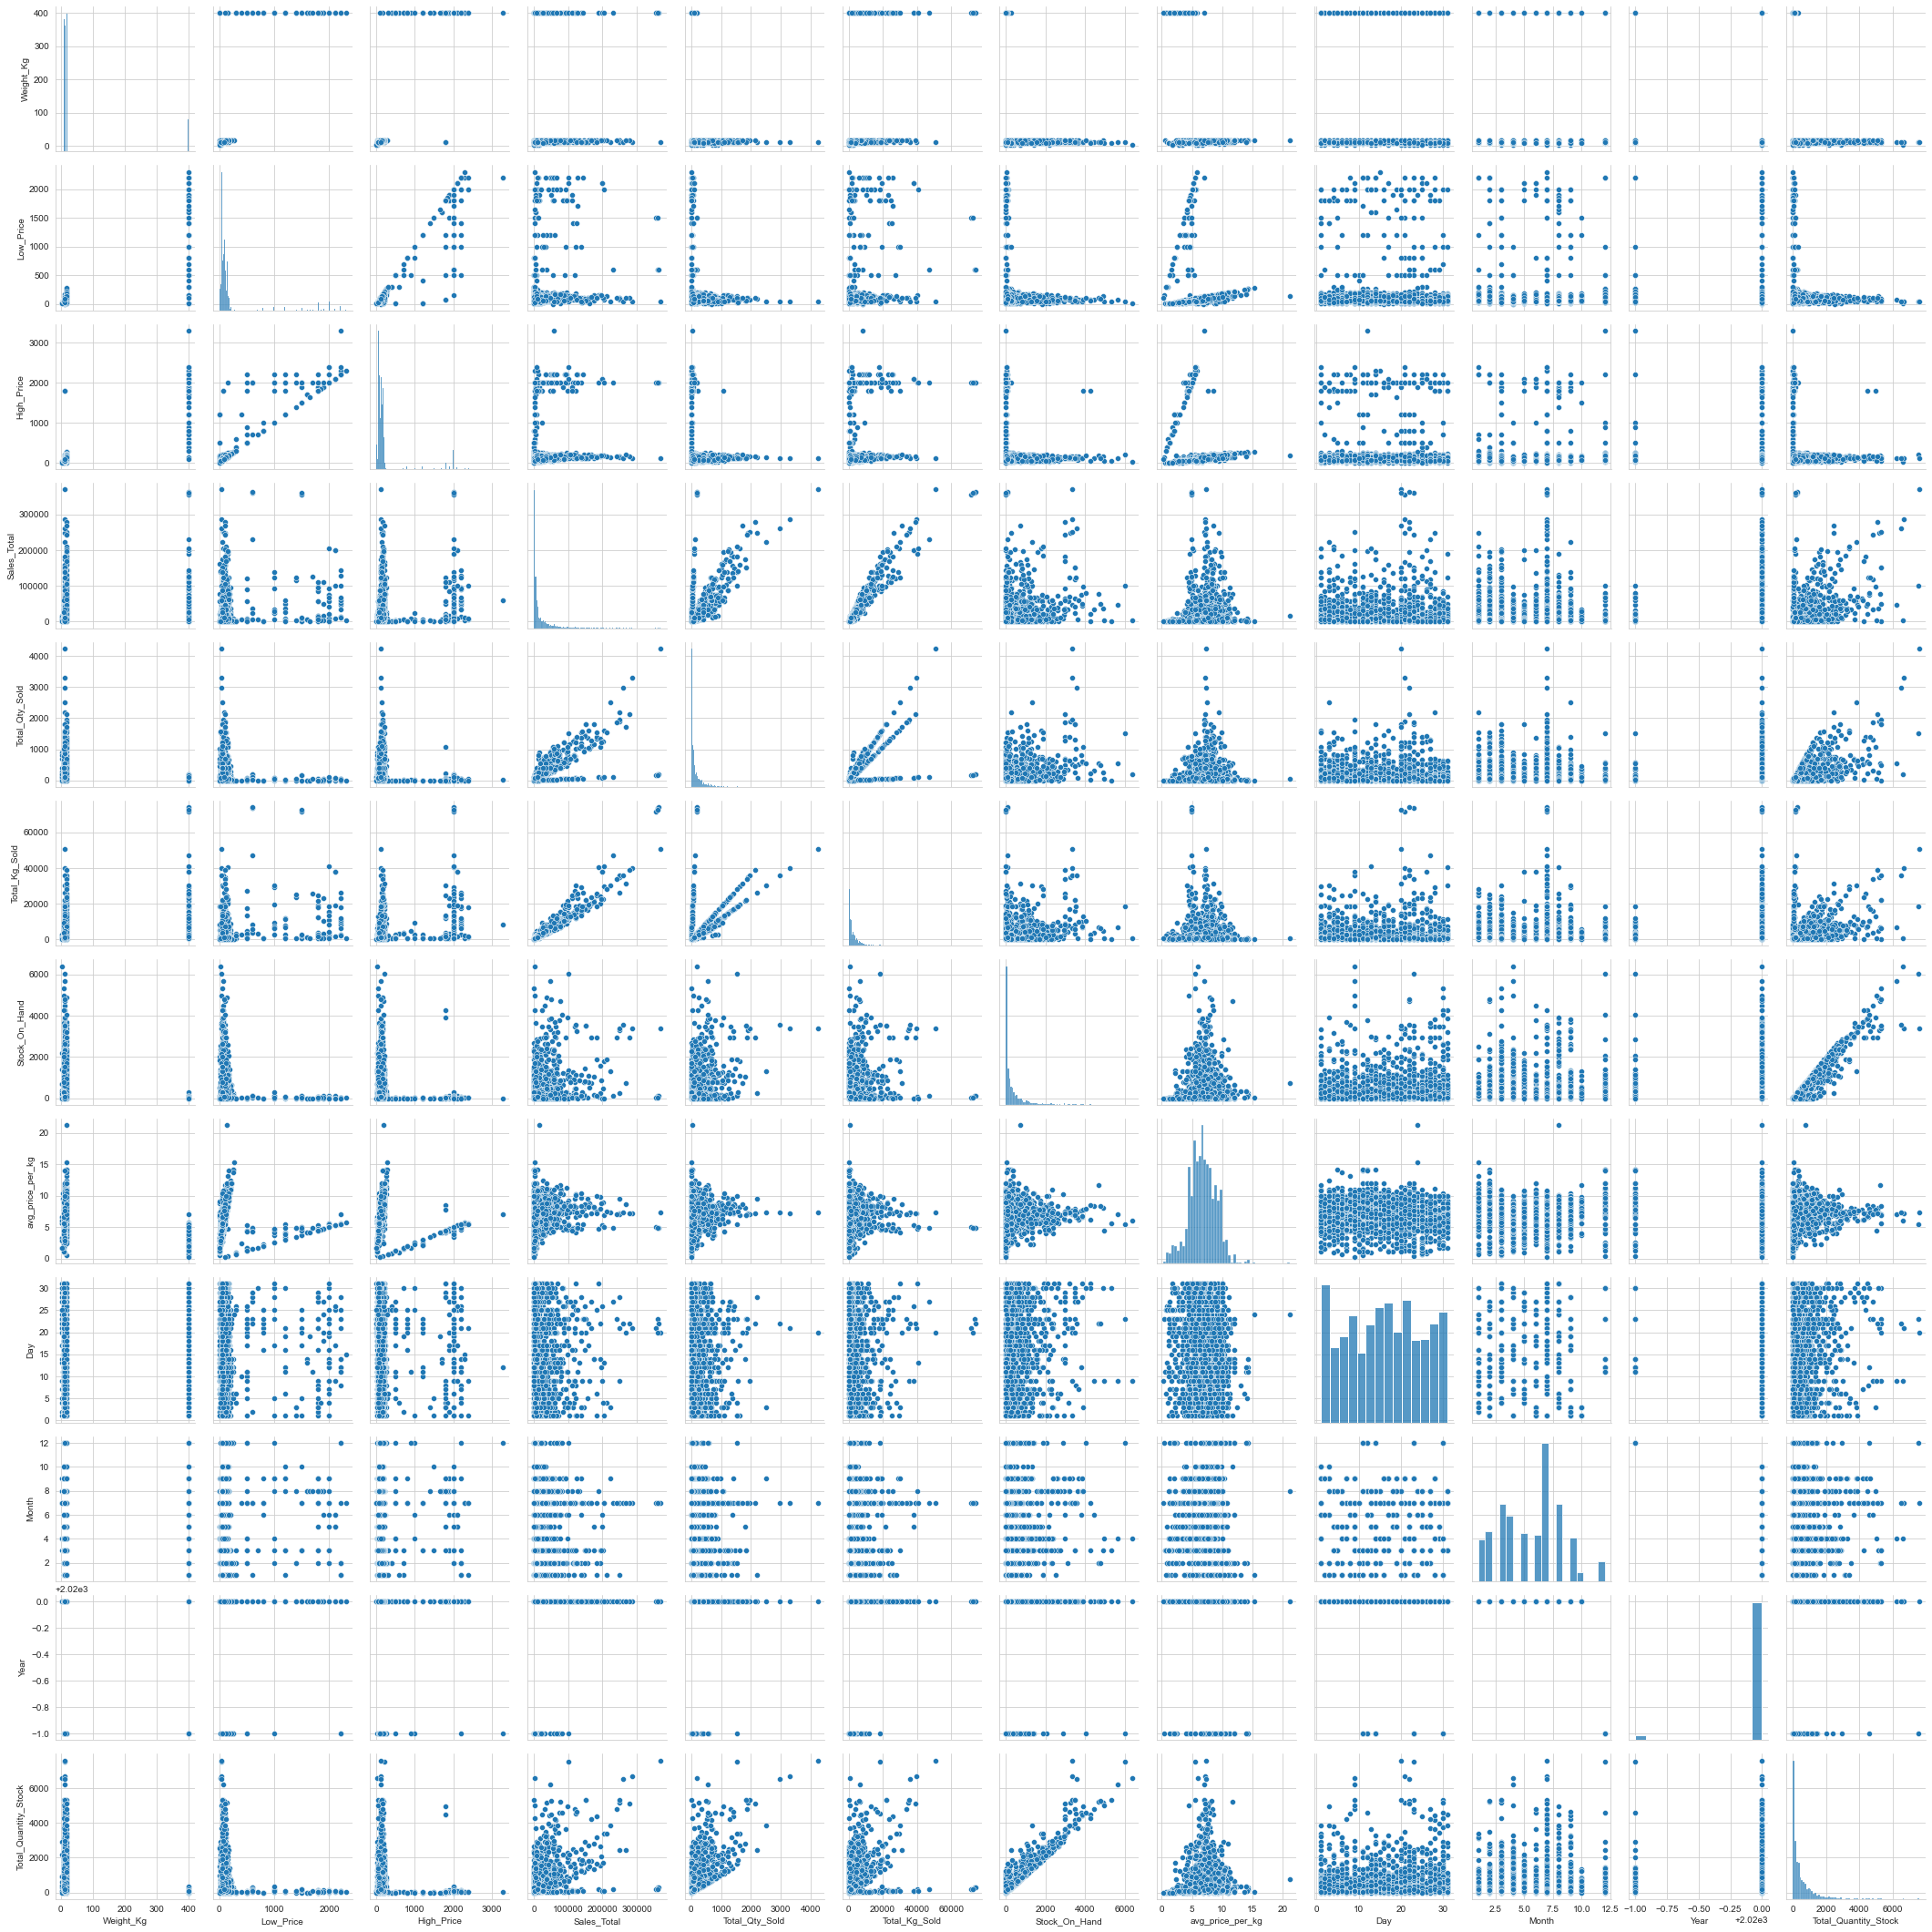

In [36]:
#Now we observe the pairplot to check for highly correlated predictors

sns.set_style("whitegrid");
sns.pairplot(df_train);
plt.show();

**Still we are getting a very strong correlation among Low Price, High Price and Weight_Kg**, which is not good. 

The presence of any correlation among predictors is detrimental to model quality for two reasons:

**1. It tends to increase the standard error;**

**2. It becomes difficult to estimate the effect of any one predictor variable on the response variable.**

In [37]:
df_train_dummy = pd.get_dummies(df_train, drop_first = True)

In [38]:
#Now we check for any duplicates in our train data 
duplicateRowsDF = df_train_dummy[df_train_dummy.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Weight_Kg, Low_Price, High_Price, Sales_Total, Total_Qty_Sold, Total_Kg_Sold, Stock_On_Hand, avg_price_per_kg, Day, Month, Year, Total_Quantity_Stock, Province_EASTERN CAPE, Province_NATAL, Province_ORANGE FREE STATE, Province_TRANSVAAL, Province_W.CAPE-BERGRIVER ETC, Province_WEST COAST, Container_DT063, Container_EC120, Container_EF120, Container_EG140, Container_IA400, Container_JE090, Container_JG110, Container_M4183, Container_M6125, Container_M9125, Size_Grade_1M, Size_Grade_1S, Size_Grade_1U, Size_Grade_1X, Size_Grade_2L, Size_Grade_2M, Size_Grade_2S, Size_Grade_2U, Size_Grade_2X, Seasons_Spring, Seasons_Summer, Seasons_Winter]
Index: []

[0 rows x 40 columns]


#### There are no repeating rows for dummy all variables

In [39]:
X = df_train_dummy.drop('avg_price_per_kg', axis=1)
y = df_train_dummy['avg_price_per_kg']

Text(0.5, 1.0, 'Correlation Heatmap')

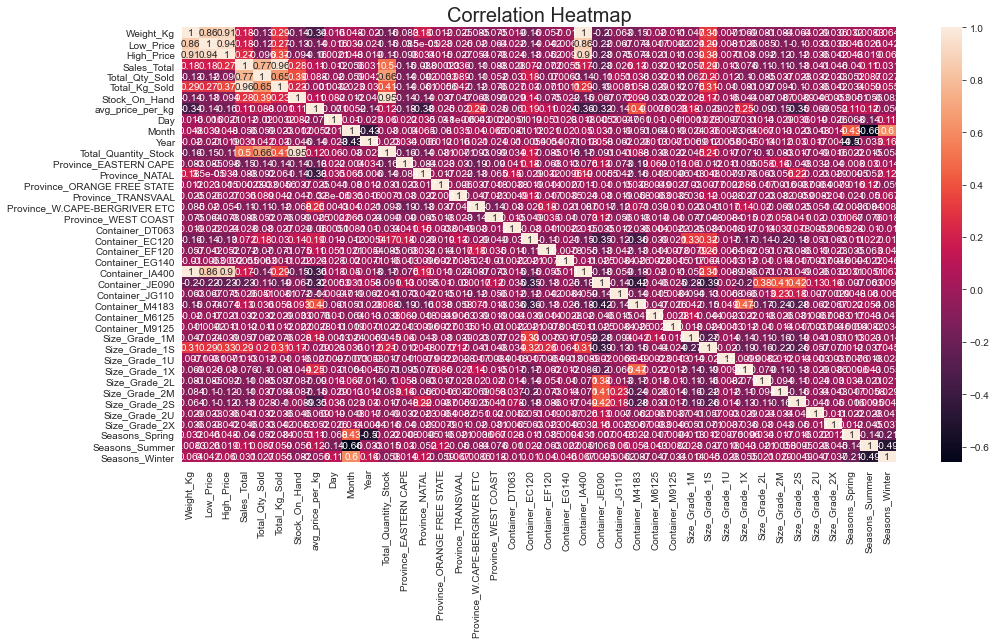

In [40]:
#Now we want to create a heatmap to see how correlated our features are. 
#The visuals easily show the relationships between this features

plt.figure(figsize=(16,8))
sns.heatmap(df_train_dummy.corr(),annot=True) 
plt.title('Correlation Heatmap', fontsize=20)

In [41]:
#Now we want to create a heatmap to see how correlated our features are. 
#The visuals easily show the relationships between this features

df_train_dummy.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month,...,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Seasons_Spring,Seasons_Summer,Seasons_Winter
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,0.016251,0.047613,...,-0.007124,-0.068923,-0.080647,-0.083726,-0.064374,-0.029488,-0.036183,0.032107,0.008264,0.063980
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,-0.015764,0.039084,...,-0.008087,-0.025554,-0.084578,-0.104532,-0.102040,-0.032675,-0.038494,0.045978,0.026466,0.041839
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,0.002058,0.047717,...,-0.007067,-0.030418,-0.092192,-0.118314,-0.118517,-0.035822,-0.042342,0.047685,0.018592,0.060448
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.011699,-0.055853,...,-0.012618,-0.075793,-0.105784,-0.109908,-0.132595,-0.040623,-0.046104,-0.039928,0.105385,0.031196
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.020402,-0.058639,...,-0.012138,-0.100508,-0.085270,-0.037270,-0.027759,-0.032337,-0.033339,-0.052285,0.087445,0.026676
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,0.003238,-0.023098,...,-0.010024,-0.081291,-0.097158,-0.093815,-0.100862,-0.035961,-0.041667,-0.034211,0.058801,0.054821
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,0.081923,-0.011749,...,-0.015715,-0.044300,-0.086927,-0.086702,-0.008891,-0.046085,-0.005271,-0.005065,-0.055501,-0.082294
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.071334,0.005205,...,-0.027335,0.251451,-0.089733,-0.153372,-0.352996,-0.069457,-0.051624,0.110071,0.122488,-0.055713
Day,0.016251,-0.015764,0.002058,-0.011699,-0.020402,0.003238,0.081923,-0.071334,1.000000,0.010012,...,0.009691,-0.030633,0.014469,-0.029280,0.035713,0.019178,-0.026454,-0.068346,-0.138220,0.107508
Month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,0.005205,0.010012,1.000000,...,-0.007261,-0.064184,0.067404,0.012777,-0.022811,-0.047931,0.013578,0.432794,-0.659426,0.603540


In [63]:


# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler


# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X,columns=X.columns)

# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state = 42)

# Import metrics module
from sklearn import metrics

In [64]:
from sklearn.model_selection import RandomizedSearchCV
# Create model object
lm = LinearRegression()
lasso = Lasso(alpha=0.01)
ridge = Ridge()
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(random_state=33)
#random forest
rf_model = RandomForestRegressor(random_state=33)
#Gradient boost
GB = GradientBoostingRegressor()
#XGB
XGB=XGBRegressor()


# Train model
lm.fit(X_train, y_train)
# Train the LASSO model
lasso.fit(X_train, y_train)
#ridge
ridge.fit(X_train, y_train)
#Decision Tree
regr_tree.fit(X_train,y_train)
#Random Forest
rf_model.fit(X_train,y_train)
#Gradient boost
GB.fit(X_train,y_train)
#XGB
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
# Check training accuracy
y_pred_train = lm.predict(X_train)
train_lasso = lasso.predict(X_train)
train_ridge = ridge.predict(X_train)
train_DecTree = regr_tree.predict(X_train)
train_RanFor = rf_model.predict(X_train)
train_GB = GB.predict(X_train)
train_XGB = XGB.predict(X_train)



print('Training RMSE')
print('Linear:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Lasso:', np.sqrt(metrics.mean_squared_error(y_train, train_lasso)))
print('Ridge:', np.sqrt(metrics.mean_squared_error(y_train, train_ridge)))
print('Decision Tree:', np.sqrt(metrics.mean_squared_error(y_train, train_DecTree)))
print('Random Forest:', np.sqrt(metrics.mean_squared_error(y_train, train_RanFor)))
print('Gradient Boost:', np.sqrt(metrics.mean_squared_error(y_train, train_GB)))
print('XGB Regressor:', np.sqrt(metrics.mean_squared_error(y_train, train_XGB)))

Training RMSE
Linear: 1.3348323791343155
Lasso: 1.3767612488197107
Ridge: 1.3367116010890154
Decision Tree: 9.331283924832092e-16
Random Forest: 0.25279697096006765
Gradient Boost: 0.4530226664038309
XGB Regressor: 0.04670053978223712


In [66]:
y_pred_test = lm.predict(X_test)
test_lasso = lasso.predict(X_test)
test_ridge = ridge.predict(X_test)
test_DecTree = regr_tree.predict(X_test)
test_RanFor = rf_model.predict(X_test)
test_GB = GB.predict(X_test)
test_XGB = XGB.predict(X_test)


print('Testing RMSE')
print('Linear:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Lasso:', np.sqrt(metrics.mean_squared_error(y_test, test_lasso)))
print('Ridge:', np.sqrt(metrics.mean_squared_error(y_test, test_ridge)))
print('Decision Tree:', np.sqrt(metrics.mean_squared_error(y_test, test_DecTree)))
print('Random Forest:', np.sqrt(metrics.mean_squared_error(y_test, test_RanFor)))
print('Gradient Boost:', np.sqrt(metrics.mean_squared_error(y_test, test_GB)))
print('XGB Regressor:', np.sqrt(metrics.mean_squared_error(y_test, test_XGB)))

Testing RMSE
Linear: 1.3729964067038785
Lasso: 1.3866351325683537
Ridge: 1.3695497420438045
Decision Tree: 0.708991575202724
Random Forest: 0.5110017986364809
Gradient Boost: 0.5172701631227323
XGB Regressor: 0.44653432817752897


In [67]:
# Check training accuracy on the whole train data set
y_pred_train1 = lm.predict(X_standardise)
train_lasso1 = lasso.predict(X_standardise)
train_ridge1 = ridge.predict(X_standardise)
train_DecTree1 = regr_tree.predict(X_standardise)
train_RanFor1 = rf_model.predict(X_standardise)
train_GB1 = GB.predict(X_standardise)
train_XGB1 = XGB.predict(X_standardise)


print('Training on a whole Train data set RMSE:')
print('Linear:', np.sqrt(metrics.mean_squared_error(y, y_pred_train1)))
print('Lasso:', np.sqrt(metrics.mean_squared_error(y, train_lasso1)))
print('Ridge:', np.sqrt(metrics.mean_squared_error(y, train_ridge1)))
print('Decision Tree:', np.sqrt(metrics.mean_squared_error(y, train_DecTree1)))
print('Random Forest:', np.sqrt(metrics.mean_squared_error(y, train_RanFor1)))
print('Gradient Boost:', np.sqrt(metrics.mean_squared_error(y, train_GB1)))
print('XGB Regressor:', np.sqrt(metrics.mean_squared_error(y, train_XGB1)))

Training on a whole Train data set RMSE:
Linear: 1.3425638069473038
Lasso: 1.37874472405097
Ridge: 1.3433536164914364
Decision Tree: 0.31731422860018604
Random Forest: 0.3215746169991586
Gradient Boost: 0.46660098038318637
XGB Regressor: 0.20416648112036323


In [79]:
from sklearn.metrics import r2_score
names = ['Linear','Lasso','Ridge','Decision Tree','Random Forest','Gradient Boost','XGB Regressor']
regressors = [LinearRegression(),Lasso(alpha=0.01),Ridge(),DecisionTreeRegressor(random_state=33),
       RandomForestRegressor(random_state=33),
GradientBoostingRegressor(),
XGBRegressor()]

R = []
modells = {}
for name, reg in zip(names,regressors):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_p = reg.predict(X_train)
    y_a = reg.predict(X_standardise)
    
    rmse_train = np.round(np.sqrt(metrics.mean_squared_error(y_train, y_p)),4)
    rmse_test = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)
    rmse_all = np.round(np.sqrt(metrics.mean_squared_error(y, y_a)),4)
    
    mse_train = np.round(metrics.mean_squared_error(y_train, y_p),4)
    mse_test = np.round(metrics.mean_squared_error(y_test, y_pred),4)
    mse_all = np.round(metrics.mean_squared_error(y, y_a),4)
    
    r2_train = np.round(r2_score(y_train, y_p),4)
    r2_test = np.round(r2_score(y_test, y_pred),4)
    r2_all = np.round(r2_score(y, y_a),4)
    
    modells[name] = reg
    
    R.append([name,rmse_train,rmse_test,rmse_all,mse_train,mse_test,mse_all,r2_train,r2_test,r2_all])
    
results = pd.DataFrame(R, columns = ['Regressor','RMSE_Xtrain','RMSE_Xtest','RMSE_Whole_Data',
                                           'MSE_Xtrain','MSE_Xtest','MSE_Whole_Data',
                                           'R^2_Xtrain','R^2_Xtest','R^2_Whole_Data'])
results.set_index('Regressor',inplace = True)

results.sort_values('RMSE_Xtest', ascending = True)

,RMSE_Xtrain,RMSE_Xtest,RMSE_Whole_Data,MSE_Xtrain,MSE_Xtest,MSE_Whole_Data,R^2_Xtrain,R^2_Xtest,R^2_Whole_Data
Regressor,,,,,,,,,
XGB Regressor,0.0467,0.4465,0.2042,0.0022,0.1994,0.0417,0.9996,0.9570,0.9918
Random Forest,0.2528,0.5110,0.3216,0.0639,0.2611,0.1034,0.9876,0.9437,0.9795
Gradient Boost,0.4530,0.5153,0.4662,0.2052,0.2655,0.2173,0.9602,0.9428,0.9570
Decision Tree,0.0000,0.7090,0.3173,0.0000,0.5027,0.1007,1.0000,0.8917,0.9801
Ridge,1.3367,1.3695,1.3434,1.7868,1.8757,1.8046,0.6534,0.5958,0.6430
Linear,1.3348,1.3730,1.3426,1.7818,1.8851,1.8025,0.6543,0.5937,0.6434
Lasso,1.3768,1.3866,1.3787,1.8955,1.9228,1.9009,0.6323,0.5856,0.6239


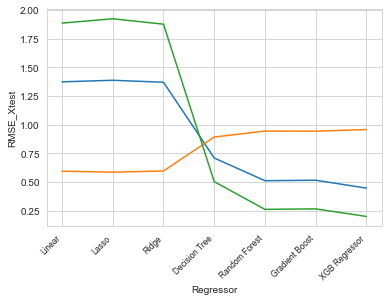

In [93]:
sns.lineplot("Regressor", "RMSE_Xtest", data=results)
sns.lineplot("Regressor", "R^2_Xtest", data=results)
sns.lineplot("Regressor", "MSE_Xtest", data=results)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.show()

#### So judging from our graph and table we see that Our best model is XGBoost because it has R-squared of 0.9570(highest), MSE of 0.1994(Lowest), RMSE of 0.0467(Lowest). 

In [48]:
#Now working with the Test data set 
df_test = pd.read_csv('df - test_set.csv')

Index = df_test.Index

df_test = df_test.drop(columns = ["Commodities","Index"], axis = 1)

df_test['Date'] = pd.to_datetime(df_test['Date'])

#We created new columns Year, Month, Day from the Date column

df_test['Day'] = df_test['Date'].dt.day
df_test['Month'] = df_test['Date'].dt.month
df_test['Year'] = df_test['Date'].dt.year

#We then created the Seasons column as it might be useful and relevant in affecting our  price of apple sales
date = df_test.Date.dt.month*100 + df_test.Date.dt.day
df_test['Seasons'] = (pd.cut(date,[0,321,620,922,1220,1300],
                       labels=['Summer','Autumn','Winter','Spring','Summer'],ordered =False)
                  .str.strip()
               )

#Then we drop the Date column since we already broke it down to three columns(Year,Month and Day)
df_test = df_test.drop(['Date'],axis = 1)
df_test["Total_Quantity_Stock"] = df_test["Total_Qty_Sold"] + df_test["Stock_On_Hand"]



X_real = pd.get_dummies(df_test, drop_first = True)


# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_real,columns=X_real.columns)

pred_lin = lm.predict(X_standardise)
pred_lasso = lasso.predict(X_standardise)
pred_ridge = ridge.predict(X_standardise)
pred_DecTree = regr_tree.predict(X_standardise)
pred_RanTree = rf_model.predict(X_standardise)
pred_GB = GB.predict(X_standardise)
pred_XGB = XGB.predict(X_standardise)

In [49]:
# create submission dataframe
submission = pd.DataFrame(
    {'Index': Index,
     'avg_price_per_kg': pred_XGB
    })

In [50]:
# save DataFrame to csv file for submission
submission.to_csv("finish.csv", index=False)